### Regresión lineal VI
## Estandarización

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta.

In [2]:
df = pd.read_csv("../datos/supermarket_limpio.csv", index_col = 0)

In [3]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,hora_compra,mes_compra
Invoice ID,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,9.1,Mañana,January
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6,Mañana,March
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4,Mañana,March
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,8.4,Noche,January
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,5.3,Mañana,February


Los objetivos del pair programming de hoy son:

Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.



    Nuestras variables predictoras son categóricas, por lo tanto todo lo contenido en este jupyter es meramente para practicar pero no nos servirá para crear nuestro modelo de ML de regresion lineal.

In [7]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,Unit price,Quantity,Tax 5%,Total,Rating
Invoice ID,,,,,
750-67-8428,74.69,7,26.1415,548.9715,9.1
226-31-3081,15.28,5,3.8200,80.2200,9.6
631-41-3108,46.33,7,16.2155,340.5255,7.4
123-19-1176,58.22,8,23.2880,489.0480,8.4
373-73-7910,86.31,7,30.2085,634.3785,5.3


In [8]:
numericas.drop(['Rating'], axis = 1, inplace = True)

In [9]:
numericas.head(1)

,Unit price,Quantity,Tax 5%,Total
Invoice ID,,,,
750-67-8428,74.69,7,26.1415,548.9715


In [10]:
robust = RobustScaler()

In [11]:
robust.fit(numericas)

RobustScaler()

In [12]:
X_robust = robust.transform(numericas)

In [14]:
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,Unit price,Quantity,Tax 5%,Total
0,0.431869,0.4,0.850677,0.850677
1,-0.886596,0.0,-0.500473,-0.500473


In [15]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna Unit price es:  0.009812028406568935
La desviación estándar de la columna Unit price es: 0.5879855381251615
-------------------------------------------------------------
La media de la columna Quantity es:  0.102
La desviación estándar de la columna Quantity es: 0.5846861190911392
-------------------------------------------------------------
La media de la columna Tax 5% es:  0.19923088912933265
La desviación estándar de la columna Tax 5% es: 0.7087505871385279
-------------------------------------------------------------
La media de la columna Total es:  0.1992308891293327
La desviación estándar de la columna Total es: 0.7087505871385281
-------------------------------------------------------------


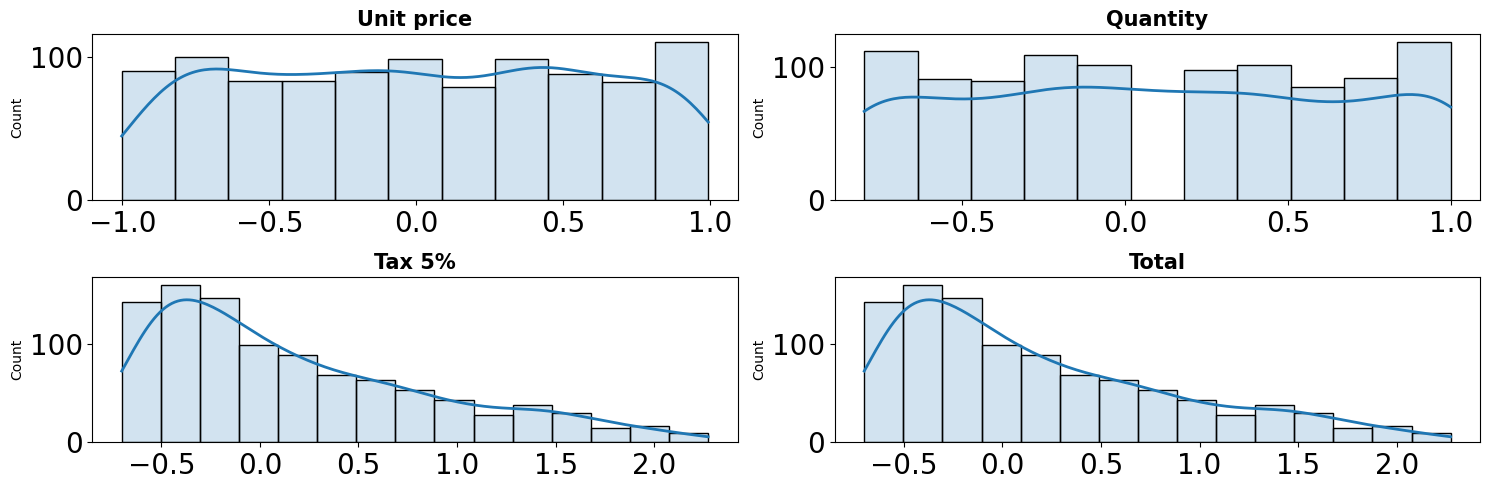

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 5))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()


In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(numericas)

StandardScaler()

In [20]:
X_escaladas = scaler.transform(numericas)

In [21]:
numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)

In [22]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna Unit price es:  -1.0658141036401502e-16
La desviación estándar de la columna Unit price es: 1.0005003753127737
-------------------------------------------------------------
La media de la columna Quantity es:  6.394884621840901e-17
La desviación estándar de la columna Quantity es: 1.0005003753127737
-------------------------------------------------------------
La media de la columna Tax 5% es:  1.2434497875801754e-16
La desviación estándar de la columna Tax 5% es: 1.0005003753127737
-------------------------------------------------------------
La media de la columna Total es:  3.1974423109204506e-17
La desviación estándar de la columna Total es: 1.0005003753127737
-------------------------------------------------------------


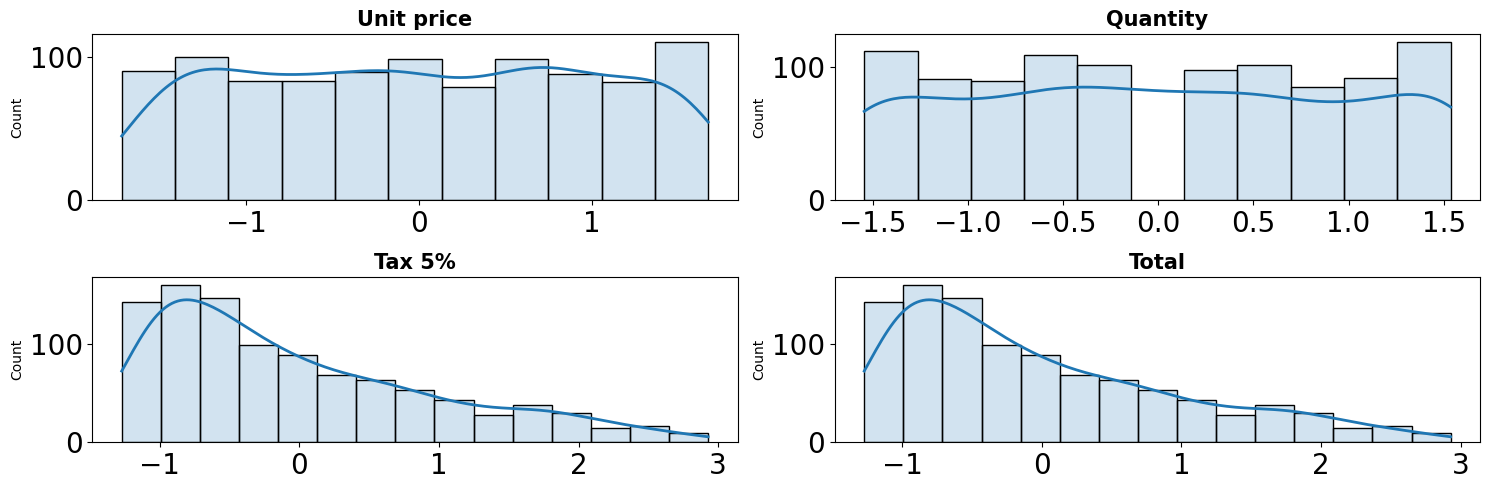

In [23]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 5))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [24]:
df.to_csv('../datos/supermarket_no_estandarizado.csv')